In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from neupy import algorithms, utils

ModuleNotFoundError: No module named 'neupy'

In [2]:
df = pd.read_csv('event2.csv',delim_whitespace=True)
print(df.head())

           x          y          z
0 -27.628780  28.757750 -57.172039
1 -27.907881  28.476280 -24.089720
2 -18.222811  35.782970  11.711950
3 -15.801570  36.892941  37.730850
4  -9.881391  38.777191  13.751660


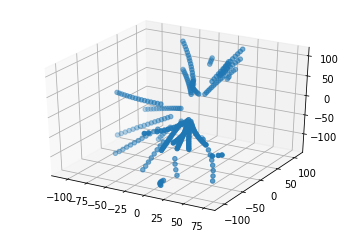

In [3]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['x'],df['y'],df['z'])

In [4]:
# scale the input to the order of 0...1

data = df[['x','y','z']]*0.01

In [5]:
# instantiate the GNG network

def create_gng(max_nodes, step=0.5, n_start_nodes=2, max_edge_age=15):
    return algorithms.GrowingNeuralGas(
        n_inputs=3,
        n_start_nodes=n_start_nodes,

        shuffle_data=True,
        verbose=True,

        step=step,
        neighbour_step=0.05,

        max_edge_age=max_edge_age,
        max_nodes=max_nodes,

        n_iter_before_neuron_added=10,
        after_split_error_decay_rate=0.1,
        error_decay_rate=0.995,
        min_distance_for_update=0.01,
    )

In [6]:
# draw the GNG network

def draw_image(graph, show=True):
    
    fig = plt.figure(figsize=(10,7))
    ax = Axes3D(fig)

    for node_1, node_2 in graph.edges:
        x1 = node_1.weight.item(0)
        y1 = node_1.weight.item(1)
        z1 = node_1.weight.item(2)
        x2 = node_2.weight.item(0)
        y2 = node_2.weight.item(1)
        z2 = node_2.weight.item(2)
        ax.scatter(x1, y1, z1, c='black', s=20, edgecolors='k', alpha=0.7) # draw nodes
        ax.plot([x1,x2],[y1,y2],[z1,z2],zdir='z',c='black',label='gng')   # draw connections

    if show:
        ax.scatter(data['x'],data['y'],data['z'],c='gray',s=10) # draw data / features
        plt.show()


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.1
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 15
[OPTION] max_nodes = 308
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 3
[OPTION] n_iter_before_neuron_added = 10
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.05
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.5
[OPTION] verbose = True

#1 : [23 ms] train: 0.289920


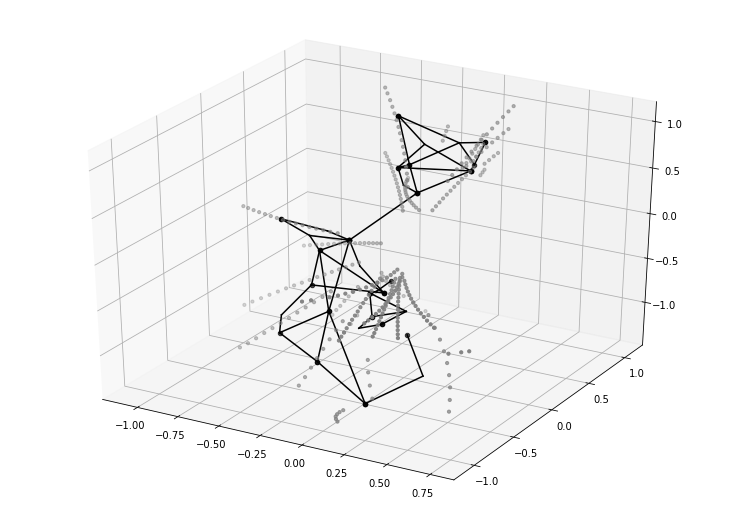

#2 : [34 ms] train: 0.136052


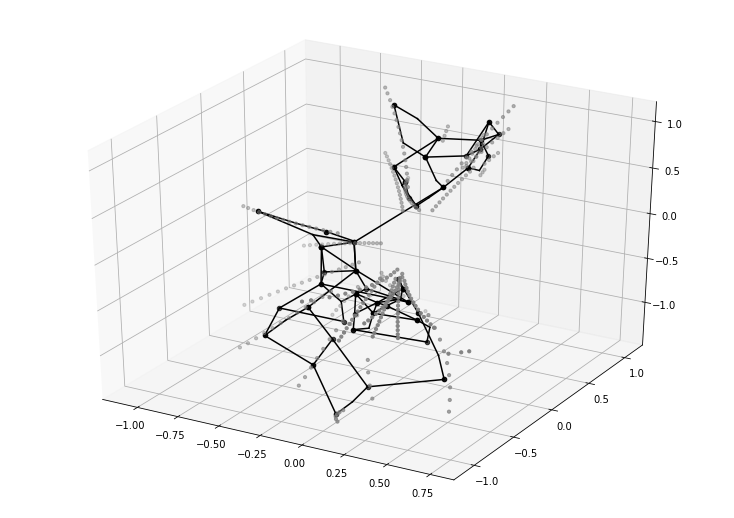

#3 : [36 ms] train: 0.092112


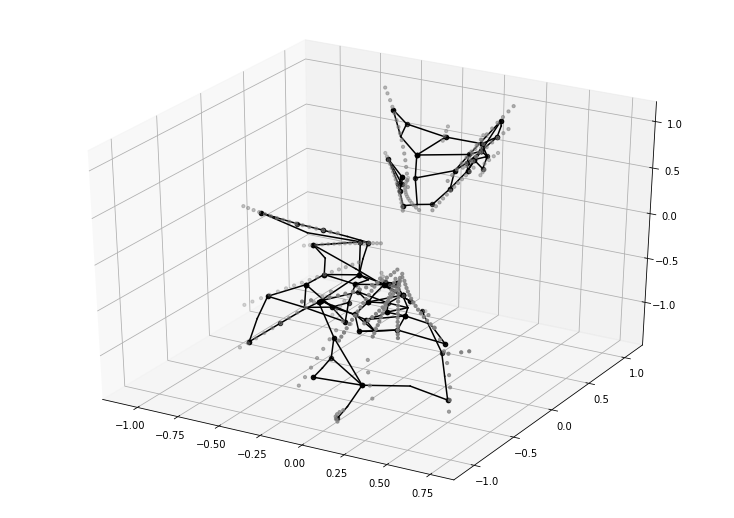

#4 : [46 ms] train: 0.068941


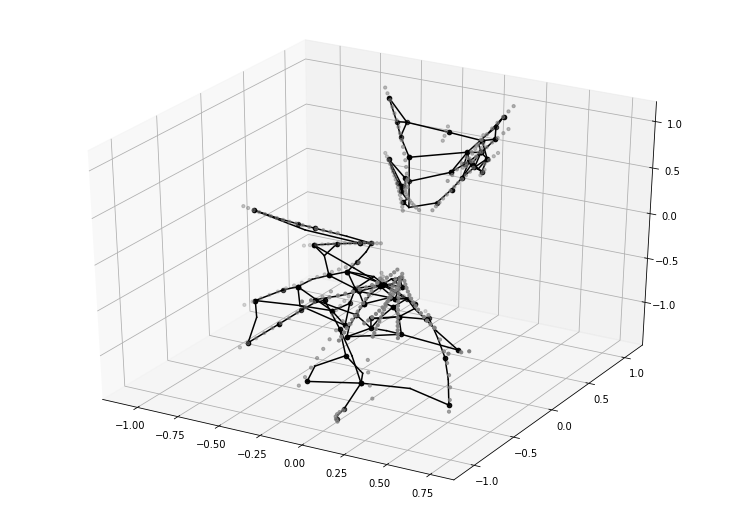

#5 : [48 ms] train: 0.056106


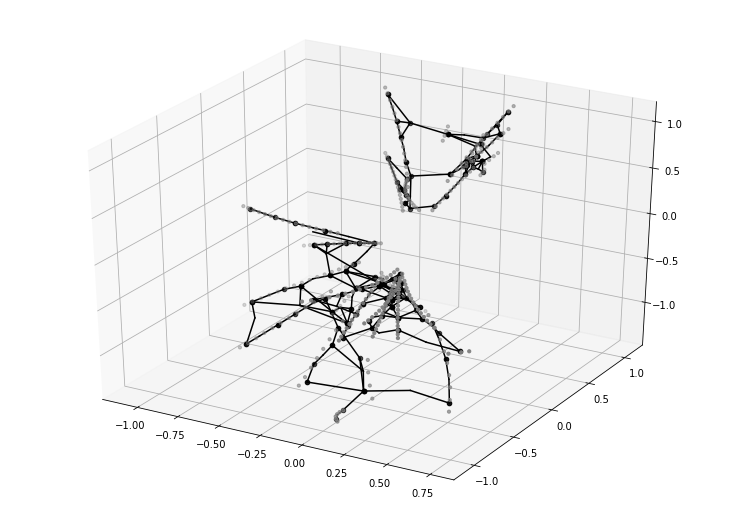

#6 : [62 ms] train: 0.047233


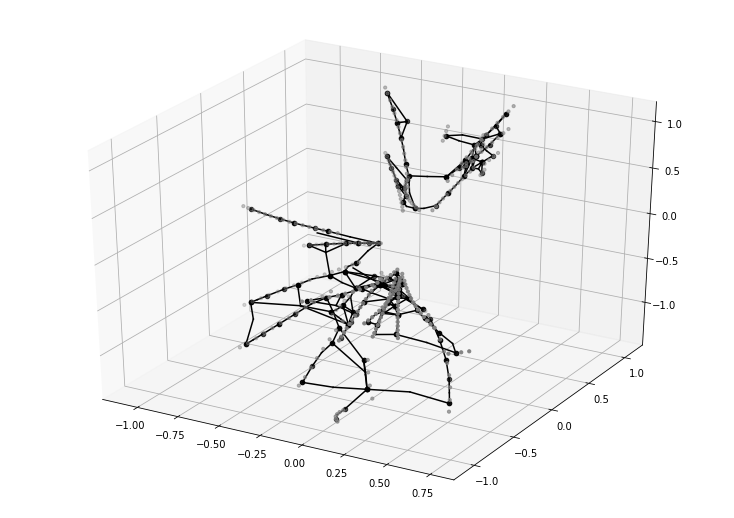

#7 : [65 ms] train: 0.039542


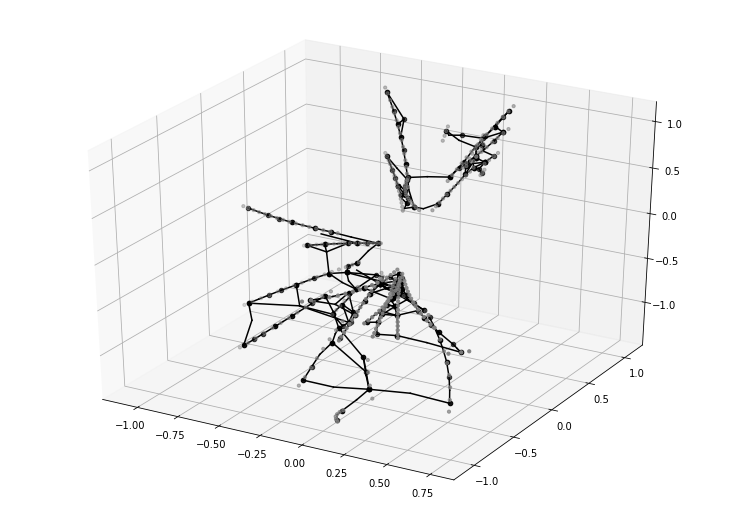

#8 : [71 ms] train: 0.032544


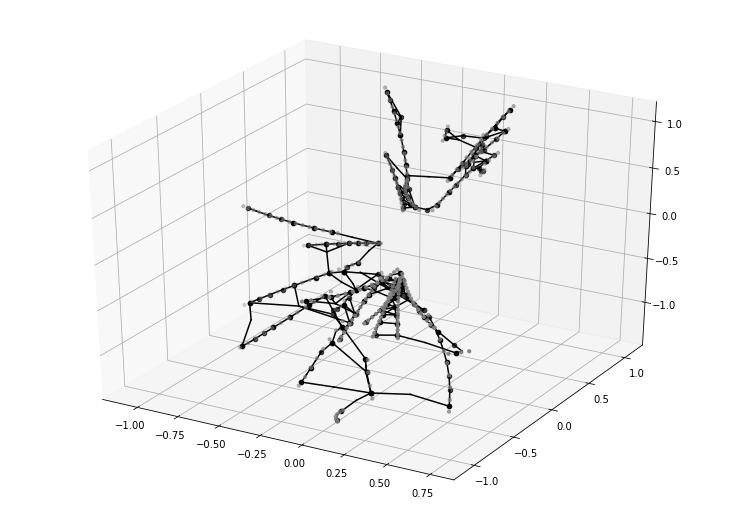

#9 : [79 ms] train: 0.026727


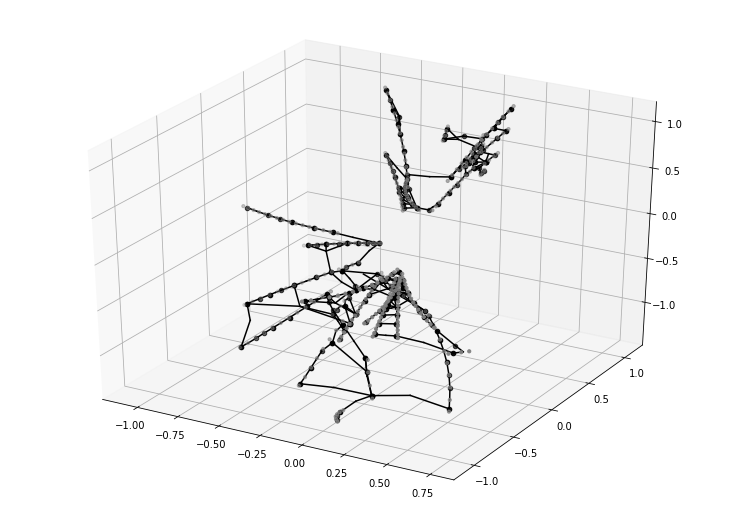

#10 : [85 ms] train: 0.021182


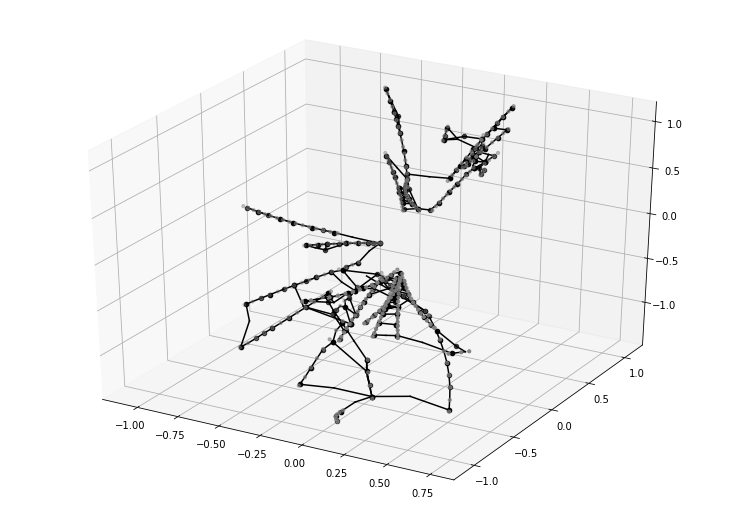

#11 : [90 ms] train: 0.016869


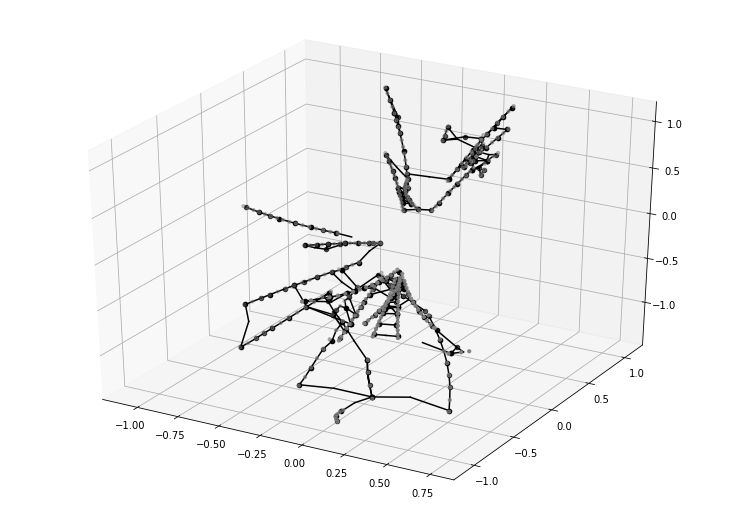

#12 : [102 ms] train: 0.013871


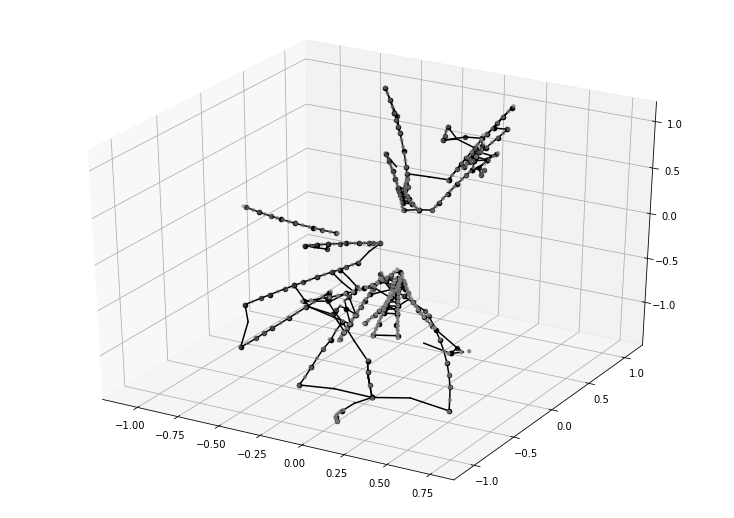

#13 : [91 ms] train: 0.012281


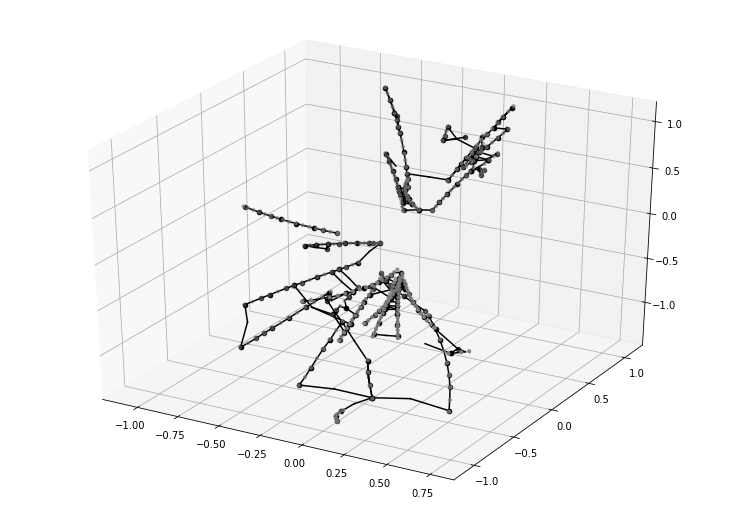

#14 : [89 ms] train: 0.011121


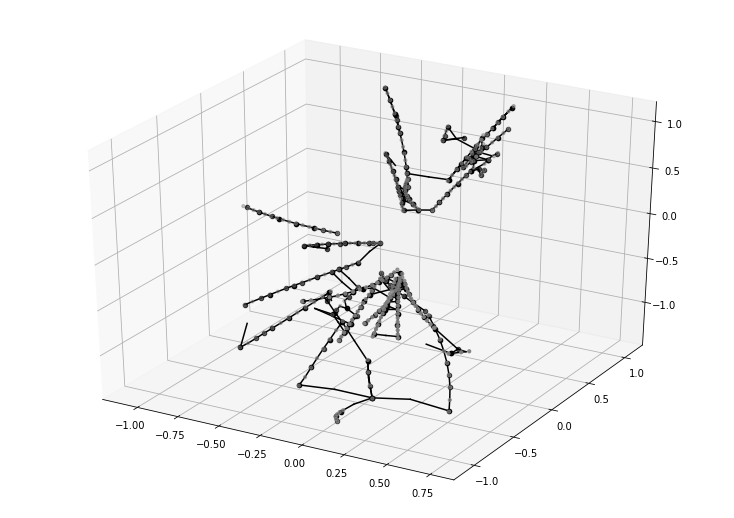

#15 : [86 ms] train: 0.010813


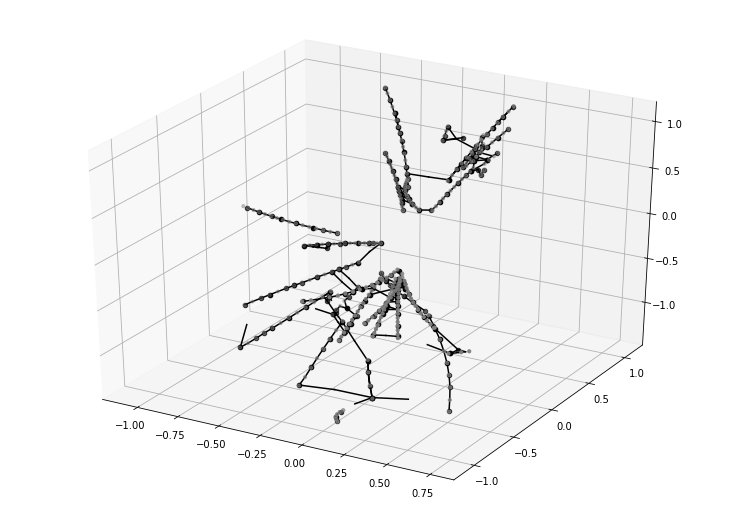

#16 : [93 ms] train: 0.010192


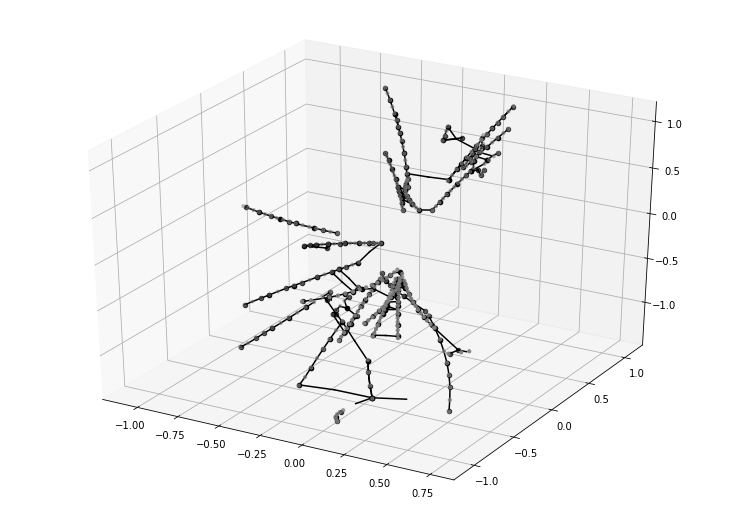

#17 : [88 ms] train: 0.009350


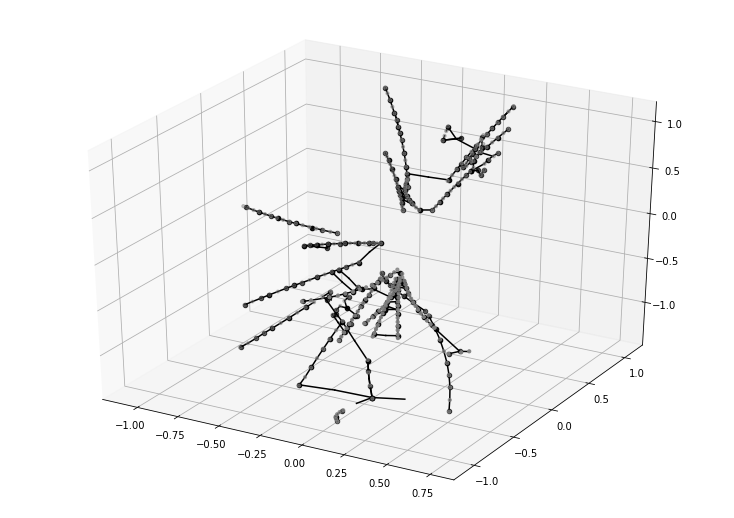

#18 : [88 ms] train: 0.009157


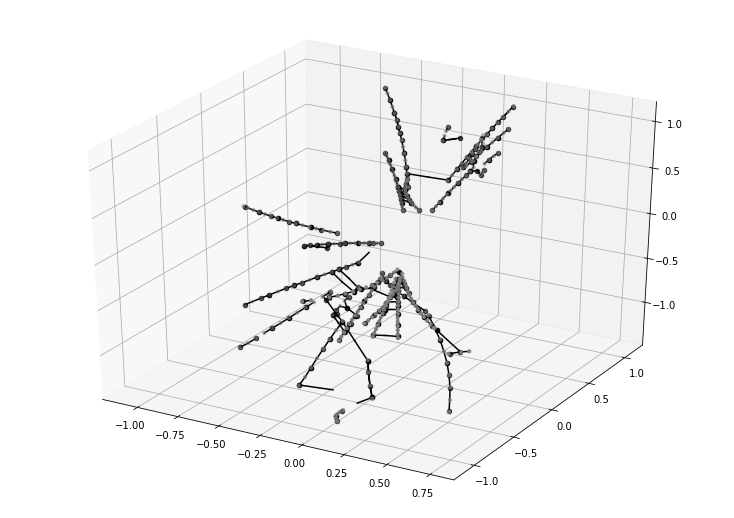

#19 : [90 ms] train: 0.008797


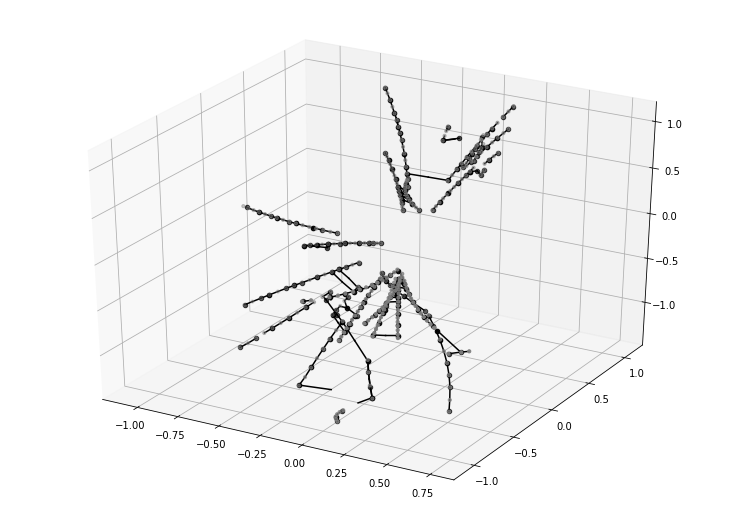

#20 : [87 ms] train: 0.008387


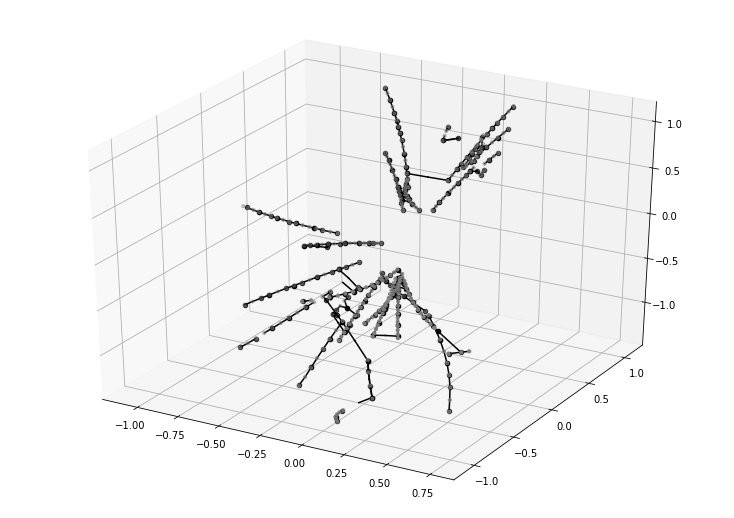

#21 : [90 ms] train: 0.007875


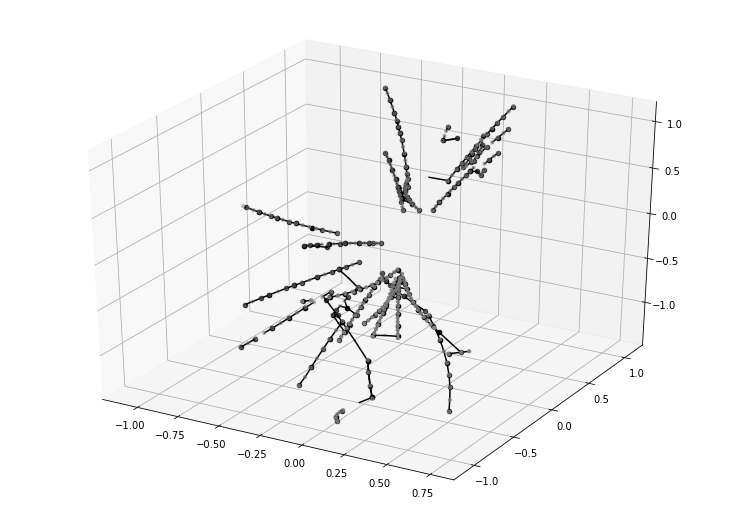

#22 : [87 ms] train: 0.007563


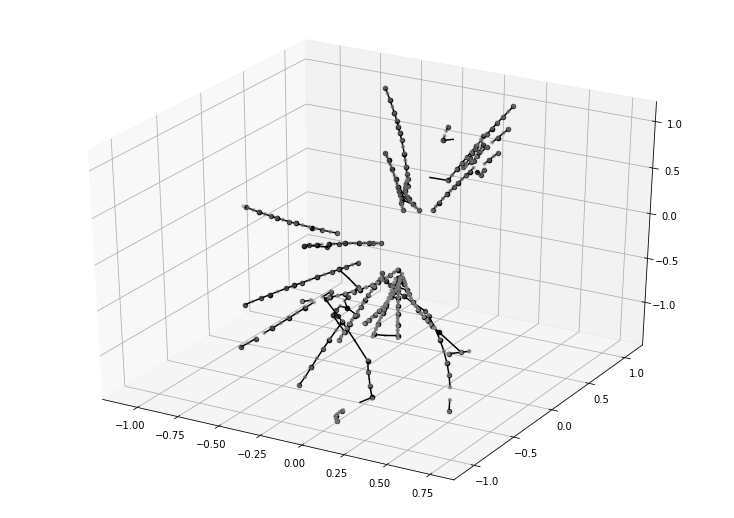

#23 : [88 ms] train: 0.007421


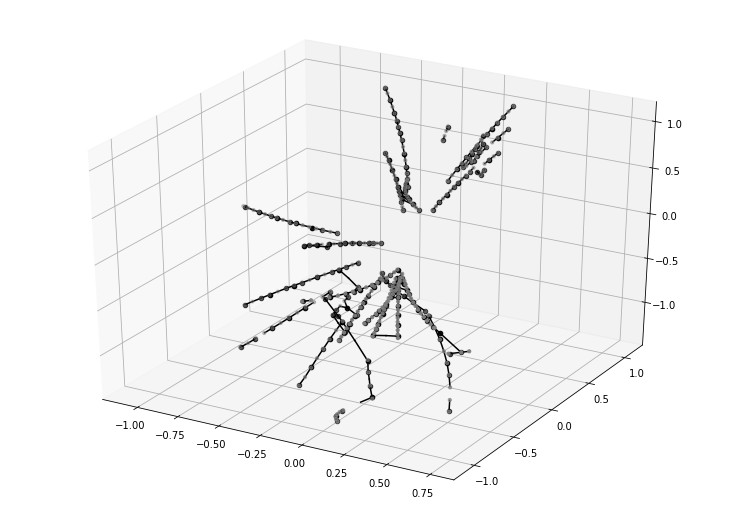

#24 : [87 ms] train: 0.006963


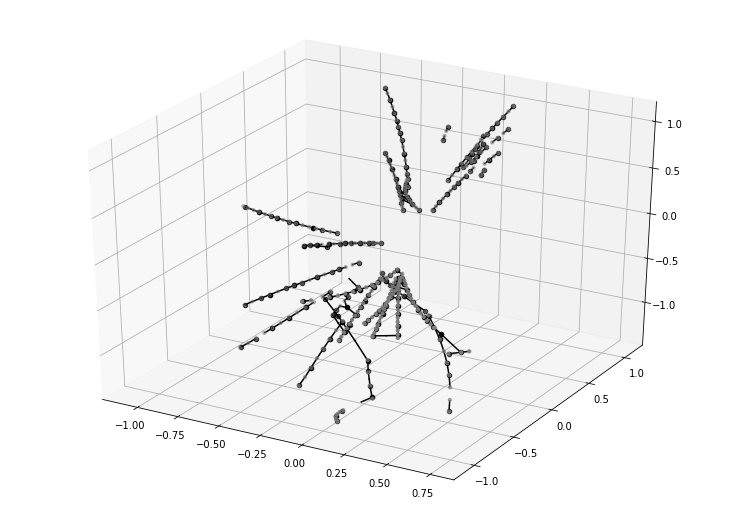

#25 : [96 ms] train: 0.006520


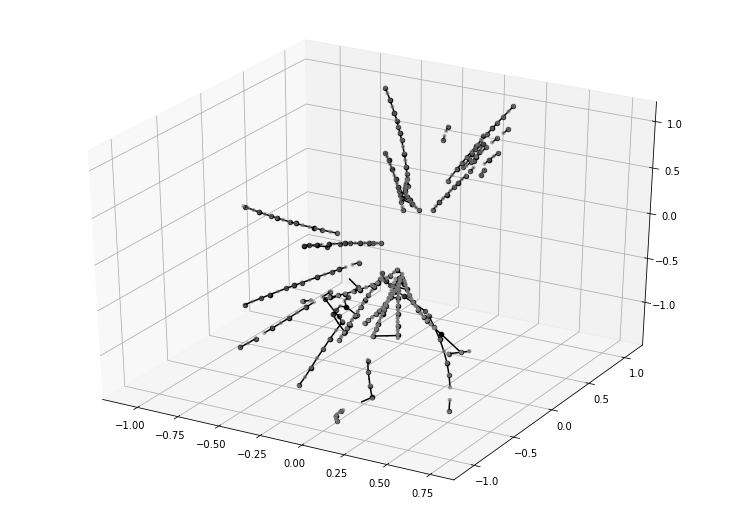

#26 : [88 ms] train: 0.006429


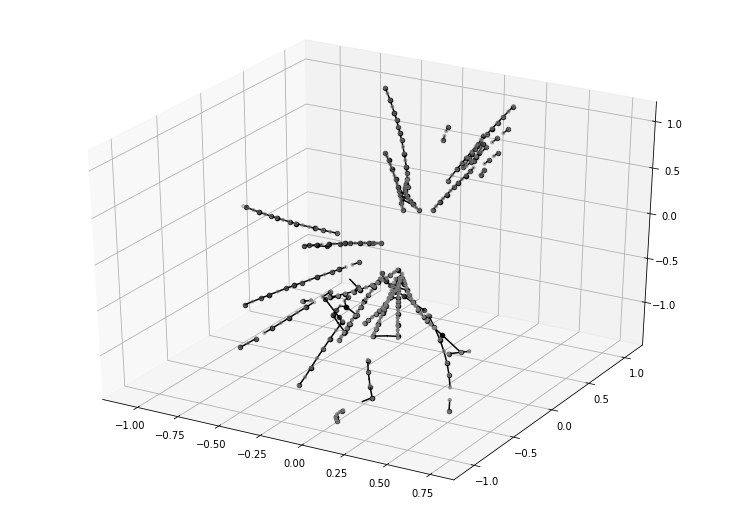

#27 : [84 ms] train: 0.006190


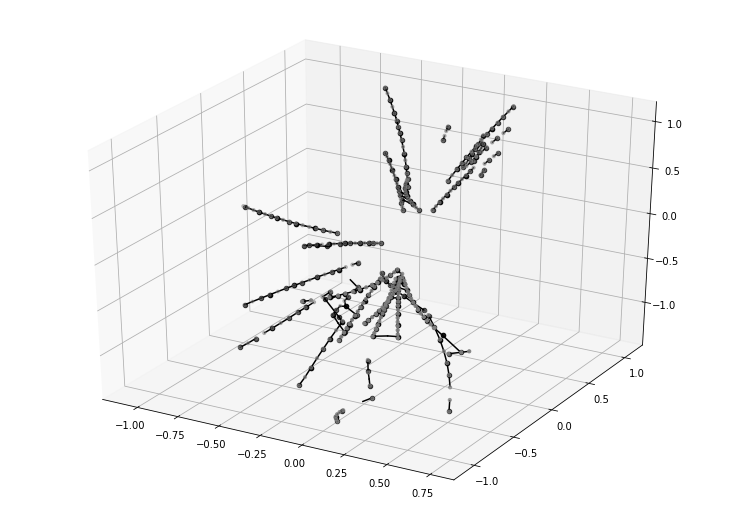

#28 : [89 ms] train: 0.006386


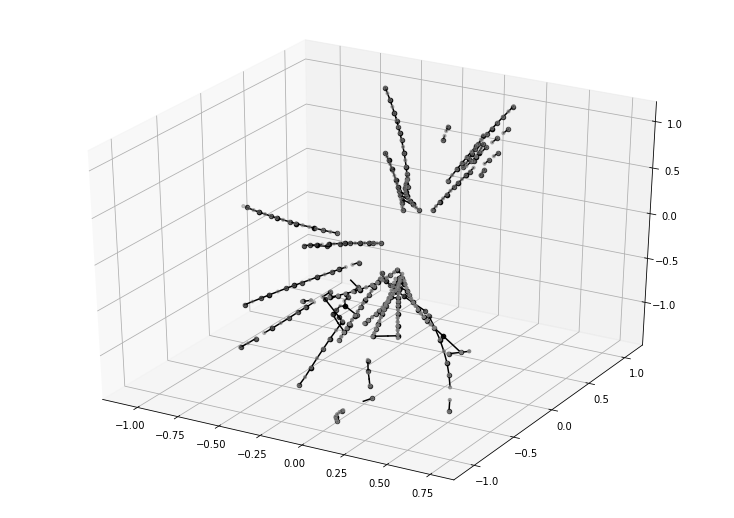

#29 : [87 ms] train: 0.006175


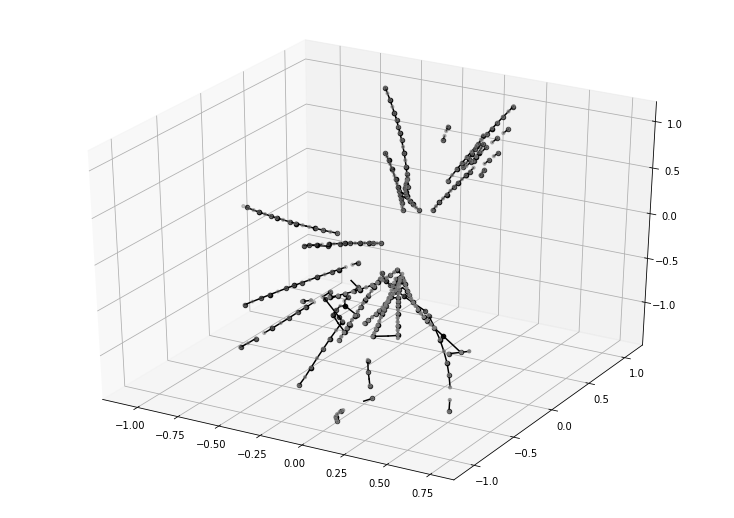

#30 : [83 ms] train: 0.006080


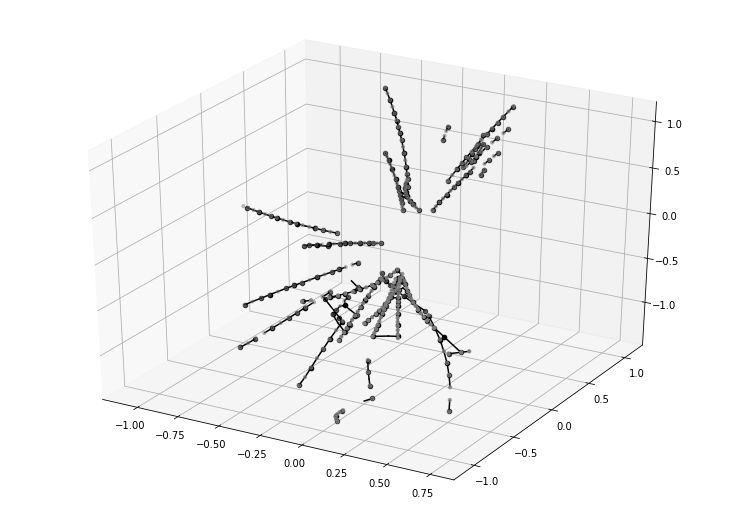

#31 : [86 ms] train: 0.006207


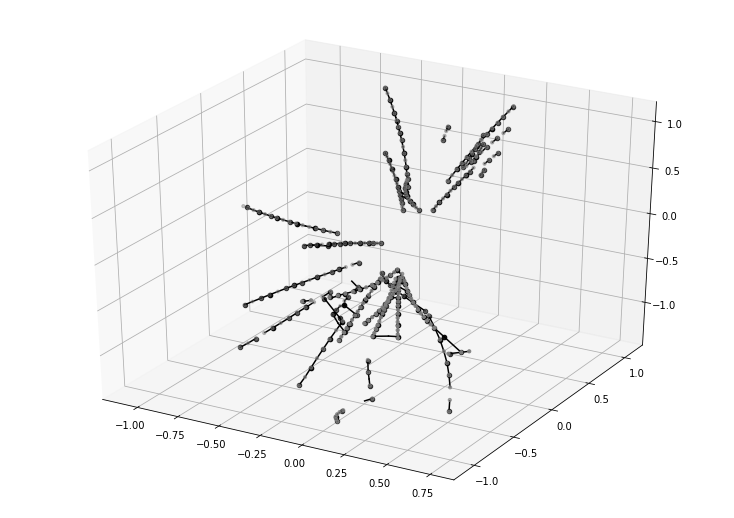

#32 : [85 ms] train: 0.006106


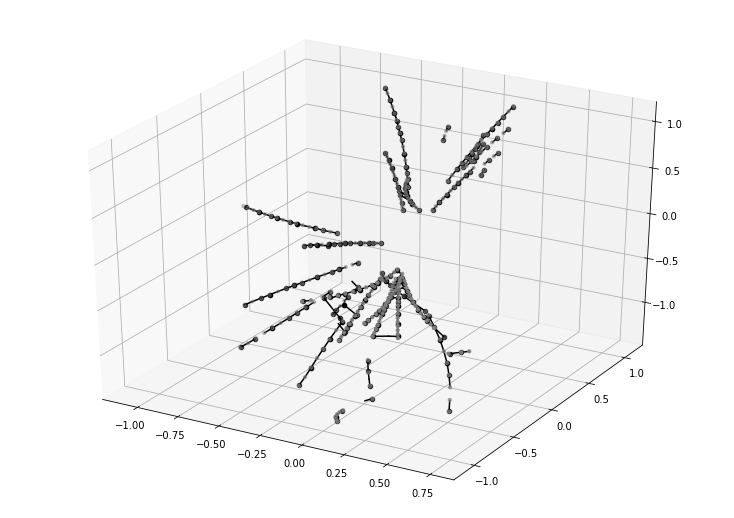

#33 : [86 ms] train: 0.005856


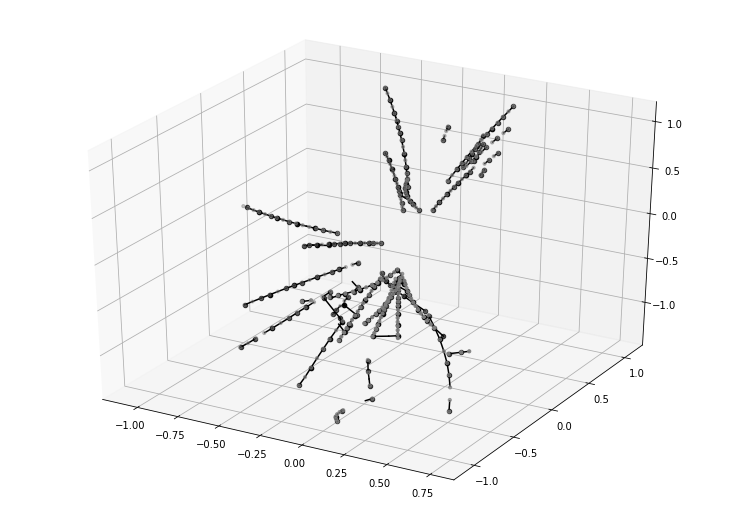

#34 : [82 ms] train: 0.005994


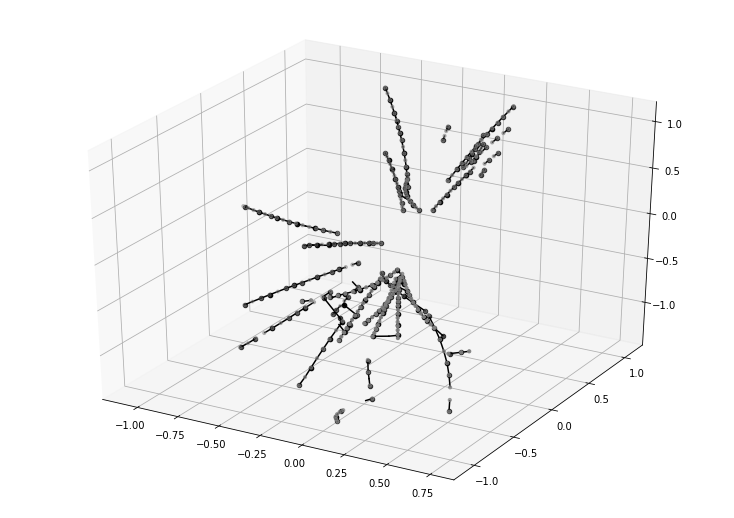

#35 : [83 ms] train: 0.006153


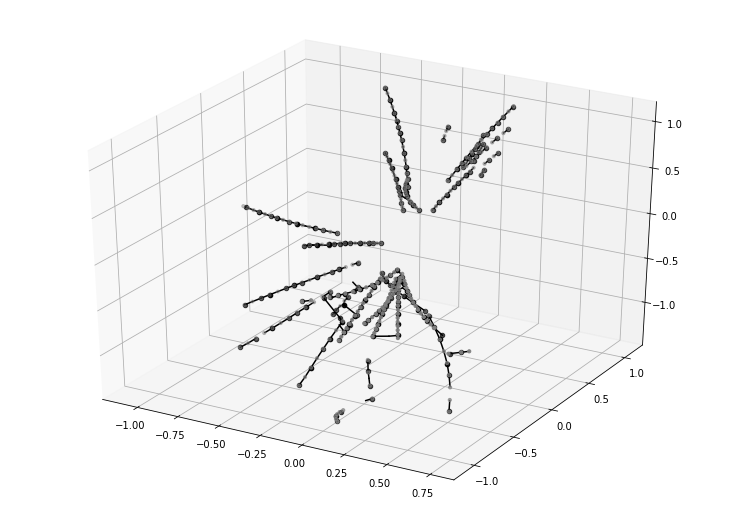

#36 : [83 ms] train: 0.006042


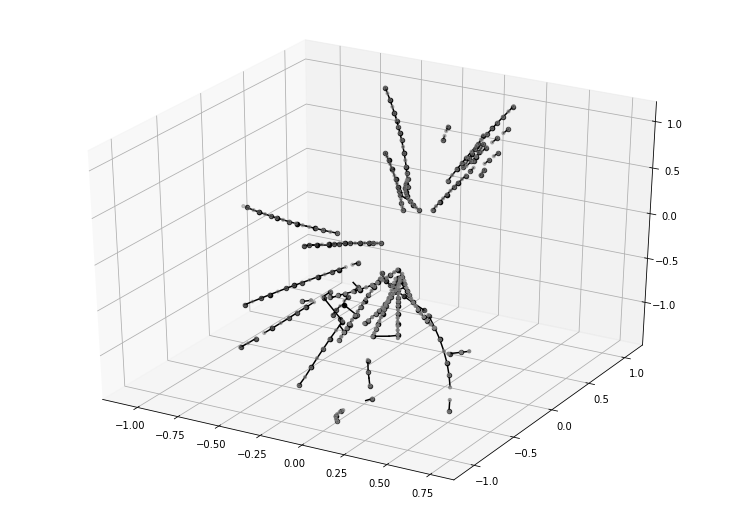

#37 : [82 ms] train: 0.005998


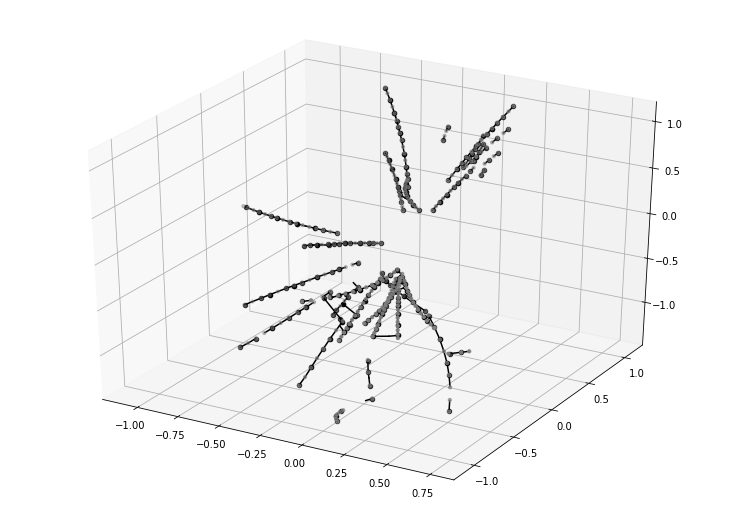

#38 : [83 ms] train: 0.005854


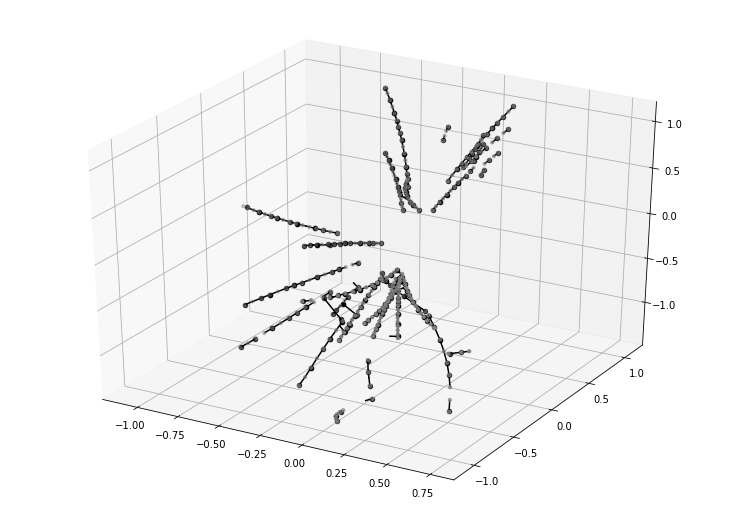

#39 : [83 ms] train: 0.005793


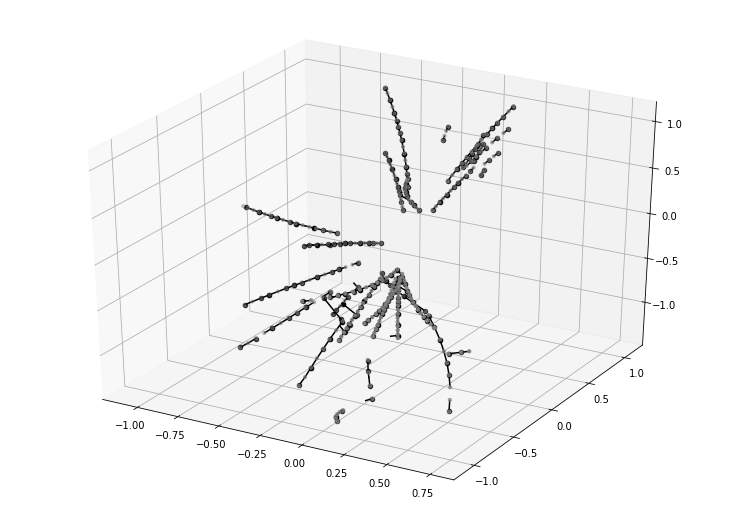

#40 : [81 ms] train: 0.005607


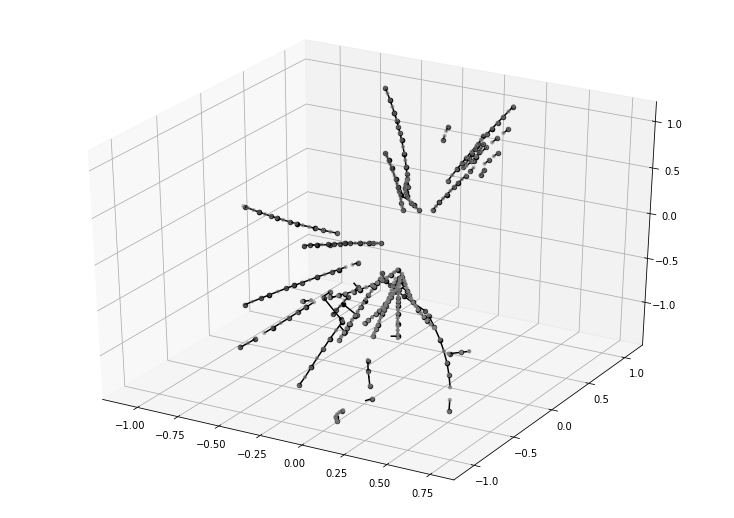

#41 : [83 ms] train: 0.005527


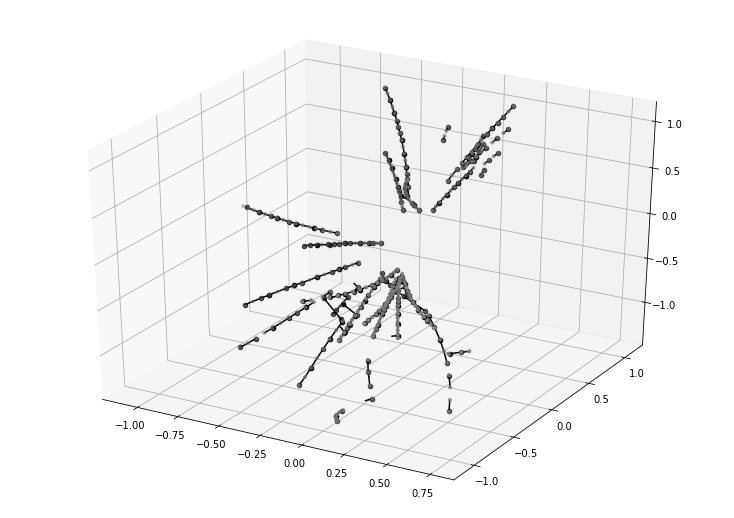

#42 : [84 ms] train: 0.005729


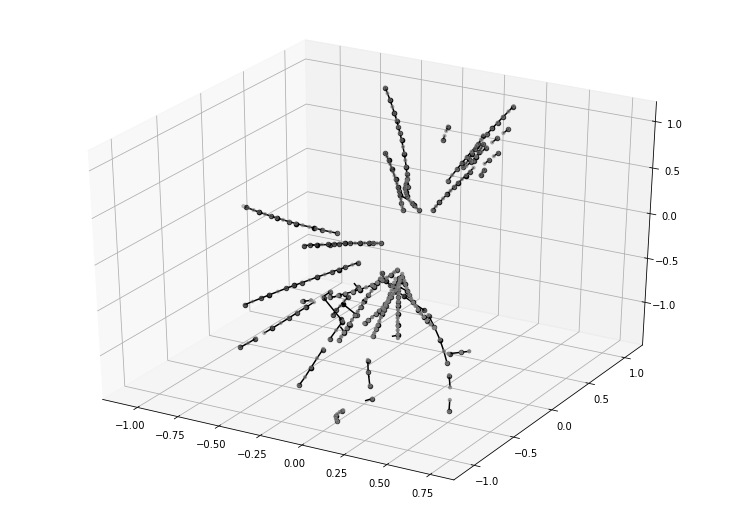

#43 : [83 ms] train: 0.005613


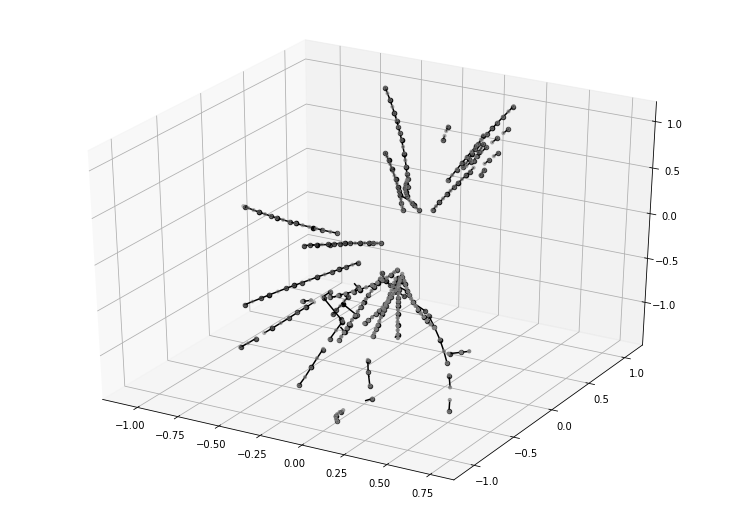

#44 : [82 ms] train: 0.005606


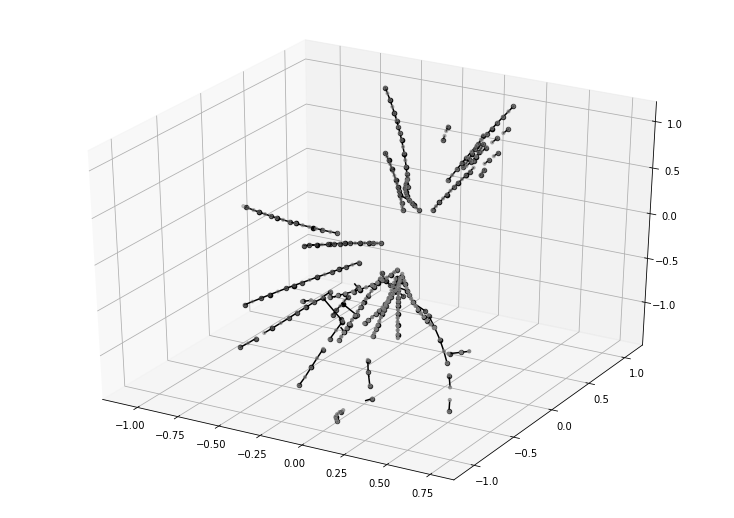

#45 : [83 ms] train: 0.005393


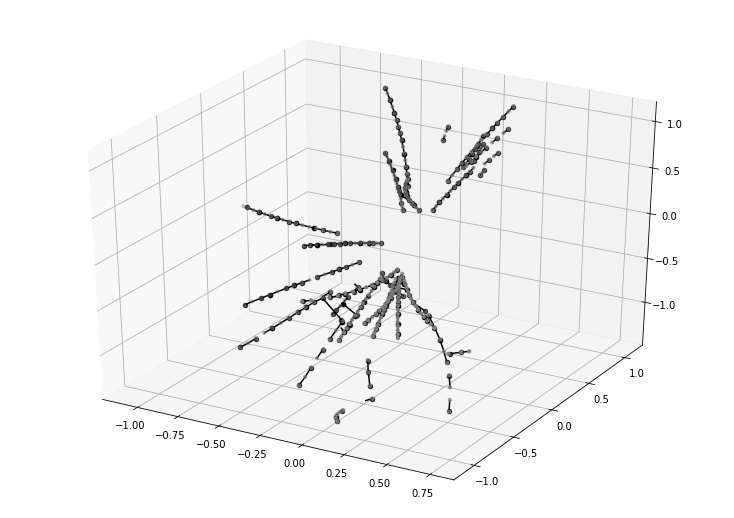

#46 : [83 ms] train: 0.005560


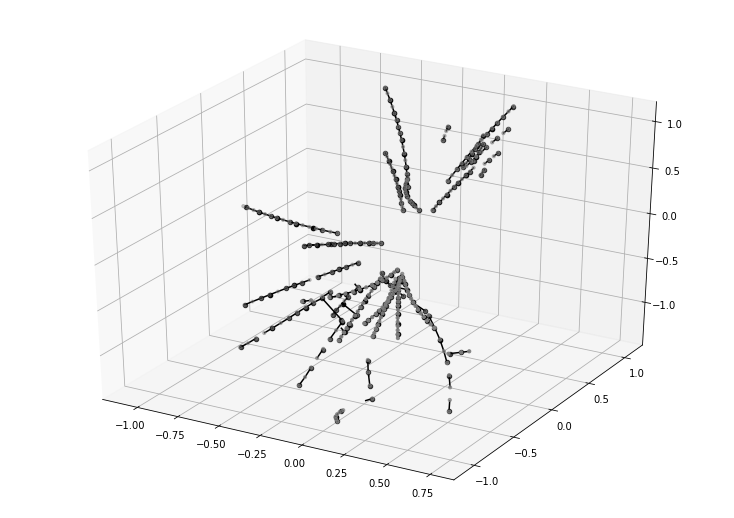

#47 : [85 ms] train: 0.005510


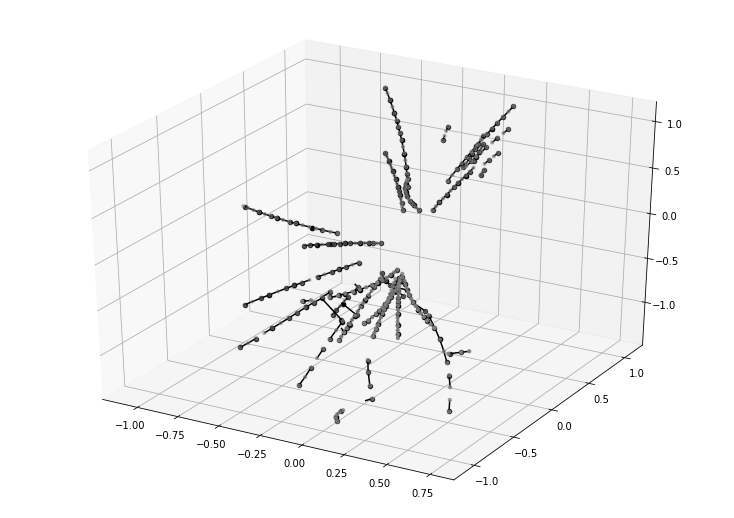

#48 : [82 ms] train: 0.005608


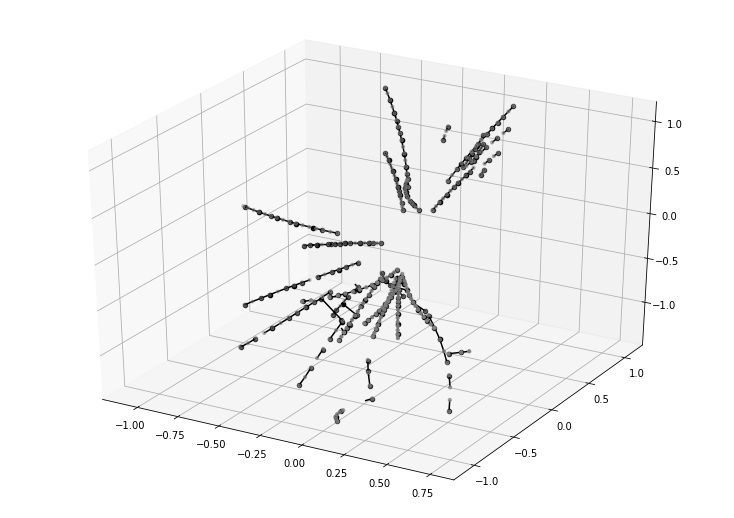

#49 : [82 ms] train: 0.005622


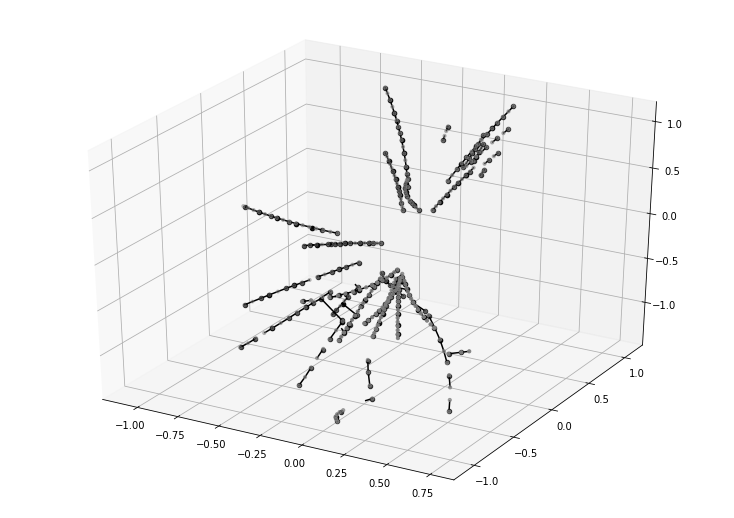

#50 : [86 ms] train: 0.005692


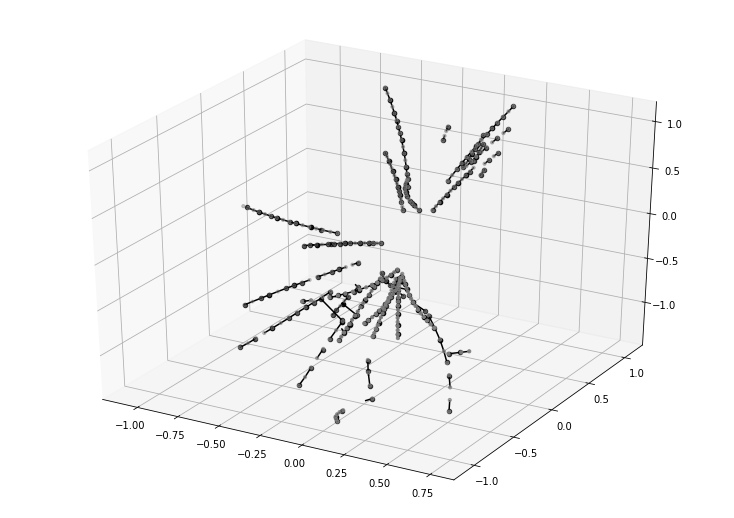

In [7]:
# train the GNG netowrk

utils.reproducible()
gng = create_gng(max_nodes=308)

for epoch in range(50):
    gng.train(data, epochs=1)
    
    # Plot images after each iteration in order to see training progress
    draw_image(gng.graph)

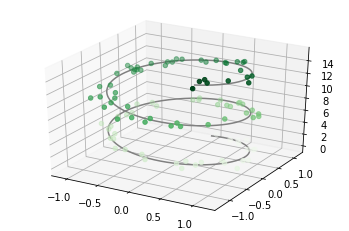

In [10]:
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');